#  **Machine Learning Algorithms On Iris Dataset**







 

 The Iris flower data set or Fisher's Iris data set is a multivariate data 
set introduced by Ronald Fisher in his 1936 paper .The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.
 It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.
Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".
 The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 
 Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. 

#  **Import Necessary Libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# **Import Dataset**

In [ ]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=['sepal-length','sepal-width','petal-length','petal-width','class']
dataset=pd.read_csv(url,names=names)

In [ ]:
print(dataset.shape)

(150, 5)


In [ ]:
#view the dataset
print(dataset.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
#The describe() method is used for calculating some statistical data 
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000




*  Pandas dataframe. groupby() function is one of the most useful function in the library it splits the data into groups based on columns/conditions and then apply some operations eg. size() which counts the number of entries / rows in each group. The groupby() can also be applied on series.



In [ ]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64




* Let's create univariate plots to better understand about each attribute(variable).As the input variables are numeric we can create a box and whiskers plot for it.A Box and Whisker Plot (or Box Plot) is a convenient way of visually displaying the data(variable) distribution through their quartiles..Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).Box plot is one of the type  univariant plots.



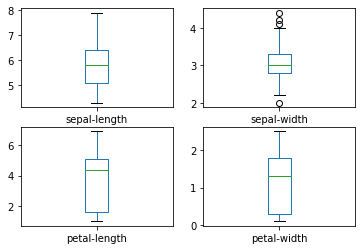

In [ ]:
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

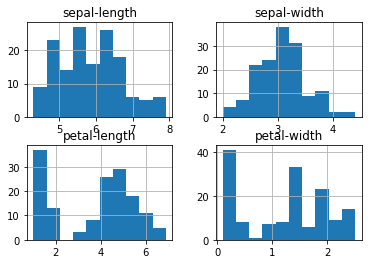

In [ ]:
dataset.hist()
plt.show()



*   Multivariate plot gives the relationship between different attributes.Scatter plot helps to spot the structured relatioship between input variables. 



<Figure size 432x288 with 0 Axes>

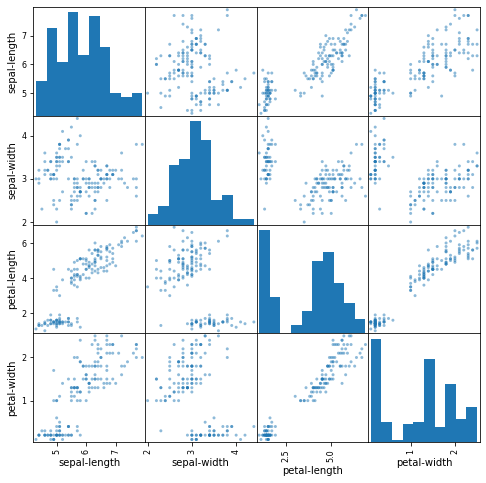

In [ ]:
plt.figure()
pd.plotting.scatter_matrix(dataset,figsize=(8,8))
plt.show()
# This can be helpful to spot structured relationships between input variables.



*    we split the dataset into independent and dependent variables. The independent variables shall be the input data, and the dependent variable is the output data.In the above dataset we have  4 independent variables namely 'sepal-length','sepal-width','petal-length','petal-width'(column numbers 1-4) and the dependent variable is the 'class' (column 5) of the above dataset.




In [ ]:
array=dataset.values
X=array[:,0:4]
Y=array[:,4]
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


# **Split Dataset into training and testing data**



*   The dataset needs to be divided into a training set and test set. The standard ratio of the train-test split is 75%-25%. We can modify as per requirements. The train_test_split() function can do this for us.


In [ ]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size,random_state=seed)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)




*   Next we will create a test harness.We will use 10-fold cross-validation to estimate the accuracy (we will use 10-fold cross validation to train and test classifiers. That means that no separate testing/validation).So 10-fold cross-validation splits the data set into 10 parts that is train on the 9 parts and test on the 1 part and this will repeat for all combinaton of train and test splits.I am using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). I will be using the scoring variable when I run build and evaluate each model next.



# **Model Fitting**

In [ ]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'



*   We will be using scoring variable when we run the build and evaluate each model in the next step



In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
  

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.950000 (0.076376)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


In [ ]:
pd.DataFrame(results).apply(lambda x: (np.mean(x),np.sqrt(np.var(x))),axis=1)

0    (0.9833333333333334, 0.03333333333333335)
1                 (0.975, 0.03818813079129868)
2    (0.9833333333333332, 0.03333333333333335)
3                  (0.95, 0.07637626158259733)
4    (0.9666666666666668, 0.04082482904638632)
5    (0.9833333333333334, 0.03333333333333335)
dtype: object



*   It looks like KNN has the largest estimated accuracy score.So we will create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).


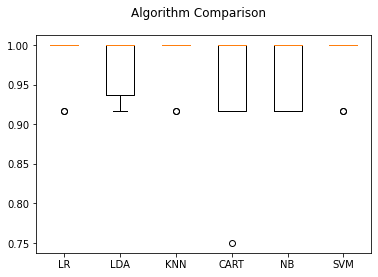

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



*    The KNN algorithm was the most accurate model that we tested. Now let us get to an idea of the accuracy of the model on our validation set. 
*   This will give  an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case I made a slip during training, such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.


*   Let us run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report..



 
 

 

In [ ]:
# Making predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



# **Conclusion** 
 

*   We can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication of the three errors made. Finally the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).

